## Implementation of Kaczmarz algorithm for updating the weights in a Polynomial linear regrsssion

In [1]:
#grade (write your code in this cell and DO NOT DELETE THIS LINE)
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from sklearn.preprocessing import PolynomialFeatures


In [2]:
## Function to generate polynomial features
## This function can be also defined using a for loop and plain NumPy

def generate_design_matrix_from_1D_data(x_initial,polynomial_order):
    """
    Input: 
    x_initial: shape=(N,) where 'N' is the number of samples
    polynomial_order: scalar: the order of polynomial you want to fit to the data
    
    ouput: design_matrix: shape=(N,polynomial_order+1)
    """
    # Initialize the design matrix
    design_matrix=np.ones((len(x_initial),polynomial_order+1),dtype='float64')
    
    # Generate the polynomial features using sklearn_preprocessing package
    poly_features=PolynomialFeatures(degree=polynomial_order)

    # Update the design matrix using the polynomial features created in the previous step
    design_matrix=poly_features.fit_transform(x_initial.reshape(-1,1))

    return design_matrix

In [3]:
np.random.seed(14)
X_initial_matrix = np.random.random((10,1))
print('X_initial_matrix: ', X_initial_matrix.shape)

X_initial_matrix = X_initial_matrix[:,0]
print('X_initial_matrix: ', X_initial_matrix)
print(X_initial_matrix.shape)
desgin_matrix = generate_design_matrix_from_1D_data(X_initial_matrix,2)
print('desgin_matrix : ', desgin_matrix )

X_initial_matrix:  (10, 1)
X_initial_matrix:  [0.51394334 0.77316505 0.87042769 0.00804695 0.30973593 0.95760374
 0.51311671 0.31828442 0.53919994 0.22125494]
(10,)
desgin_matrix :  [[1.00000000e+00 5.13943344e-01 2.64137761e-01]
 [1.00000000e+00 7.73165052e-01 5.97784198e-01]
 [1.00000000e+00 8.70427686e-01 7.57644356e-01]
 [1.00000000e+00 8.04694853e-03 6.47533806e-05]
 [1.00000000e+00 3.09735926e-01 9.59363435e-02]
 [1.00000000e+00 9.57603739e-01 9.17004922e-01]
 [1.00000000e+00 5.13116712e-01 2.63288760e-01]
 [1.00000000e+00 3.18284425e-01 1.01304975e-01]
 [1.00000000e+00 5.39199937e-01 2.90736573e-01]
 [1.00000000e+00 2.21254942e-01 4.89537495e-02]]


In [4]:
np.random.seed(100)
X_initial_case_train = np.random.random((150,150))
X_initial_case_test = np.random.random((150,150))

x_intial_case_train = X_initial_case_train[:,0]
y_target_case_train = X_initial_case_train[:,1]

x_intial_case_test = X_initial_case_test[:,0]
y_target_case_test = X_initial_case_test[:,1]

polynomial_order = 10

design_x_initial_case_train = generate_design_matrix_from_1D_data(x_intial_case_train,polynomial_order)
design_x_initial_case_test = generate_design_matrix_from_1D_data(x_intial_case_test,polynomial_order)

your_answer = design_x_initial_case_train[0]
print(f'design_x_initial_case_train:{design_x_initial_case_train.shape}')
correct_answer = np.array([1.,0.54340494,0.29528893,0.16046146,0.08719555,0.04738249,0.02574788,0.01399153,0.00760306,0.00413154,0.0022451])
print(your_answer.shape)
print(correct_answer.shape)
print(your_answer)
assert your_answer.shape == (11,)
assert np.array_equal(your_answer.round(5),correct_answer.round(5))
print('Your function looks good!')

design_x_initial_case_train:(150, 11)
(11,)
(11,)
[1.         0.54340494 0.29528893 0.16046146 0.08719555 0.04738249
 0.02574788 0.01399153 0.00760306 0.00413154 0.0022451 ]
Your function looks good!


In [5]:
def pseudo_inv(x):
    
    a=np.linalg.inv(x.T@(x))

    return a @ x.T

In [12]:
def max_likelyhood_fit(design_matrix,target_values):
    """
    Input: 
    design_matrix: shape=(N,polynomial_order+1)
    target_values: shape=(N,)
    
    ouput: weight_predictions: shape=(polynomial_order+1,)
    beta_parameter: scalar
    """
    beta_parameter = 0
    weight_predictions = np.ones(design_matrix.shape[1]) #polynomial order starting from 0
    # copy your code after this line
    
    N, M = design_matrix.shape
    assert N == len(target_values)
    
    weight_predictions = pseudo_inv(design_matrix) @ target_values
    
    residual_errors = target_values - design_matrix @ weight_predictions
    sse = residual_errors.T @ residual_errors
    beta_parameter = sse / (N - M)

    return weight_predictions, beta_parameter

In [13]:
# Test for Max Likelyhood function
np.random.seed(100)
boundary = np.random.randint(50,150)
X_initial_case_train = np.random.random((boundary,2))
x_intial_case_train = X_initial_case_train[:,0]
print('x_intial_case_train: ', x_intial_case_train.shape)
y_target_case_train = X_initial_case_train[:,1]
print('y_target_case_train: ', y_target_case_train.shape)


polynomial_order = np.random.randint(5,20)
print('polynomial_order: ', polynomial_order)

x_intial_case_train = generate_design_matrix_from_1D_data(x_intial_case_train,polynomial_order)
print('x_intial_case_train: ', x_intial_case_train.shape)
your_weights,your_beta_parameter = max_likelyhood_fit(x_intial_case_train,y_target_case_train)

correct_weights = np.array([7.05804010e-02,1.65034997e+01,-1.97504919e+02,1.12260234e+03,
                  -3.30344154e+03,5.10641884e+03,-3.92550598e+03,1.18161086e+03])
print(f'your_weights:{your_weights}')
print(f'your_weights:{your_weights.shape}')
assert your_weights.shape == (8,)
assert np.allclose(your_weights.round(5),correct_weights.round(5),atol=1e-8)
print('Your function looks good!')

x_intial_case_train:  (58,)
y_target_case_train:  (58,)
polynomial_order:  7
x_intial_case_train:  (58, 8)
your_weights:[ 7.05803119e-02  1.65035043e+01 -1.97504978e+02  1.12260266e+03
 -3.30344240e+03  5.10642006e+03 -3.92550685e+03  1.18161111e+03]
your_weights:(8,)
Your function looks good!


In [14]:
def kaczmarz(design_matrix,target_values,iterations):
    """
    Input: 
    design_matrix: shape=(N,polynomial_order+1)
    target_values: shape=(N,)
    
    ouput: weight_predictions: shape=(polynomial_order+1,)
    beta_parameter: scalar
    """
    beta_parameter = 0
    weight_predictions = np.zeros(design_matrix.shape[1]) #polynomial order starting from 0


    N, polynomial_order = design_matrix.shape
    # N is the number of observations, and it is equal to the polynomial degree +1 to account for x**0, always one more to determine the intercept

    print('N, polynomial_order : ',  N, polynomial_order, "\n\n\n")


    for k in range(iterations):
        for i in range(N):

            a = design_matrix[i,:]
    
            # print('a: ', a.shape)
            # print('weight_predictions: ', weight_predictions.shape)
            # print('target_values: ', target_values.shape)
            # print('np.linalg.norm(a)**2: ', np.linalg.norm(a)**2)
            
            weight_predictions = weight_predictions + ((target_values[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T


    # This is for beta

    residual_errors = target_values - design_matrix @ weight_predictions
    sse = residual_errors.T @ residual_errors
    beta_parameter = sse / (N - polynomial_order)

    return weight_predictions, beta_parameter

In [101]:
np.random.seed(100)
boundary = np.random.randint(50,150)
X_initial_case_train = np.random.random((boundary,2))
x_intial_case_train = X_initial_case_train[:,0]
print('x_intial_case_train: ', x_intial_case_train.shape)
y_target_case_train = X_initial_case_train[:,1]
print('y_target_case_train: ', y_target_case_train.shape)

np.dot(x_intial_case_train,y_target_case_train)



x_intial_case_train:  (58,)
y_target_case_train:  (58,)


10.543911434528882

In [121]:
# Generate some random data
x = np.linspace(-1, 1, 100)
y = 2 * x**2 - 3 * x + 1 + np.random.normal(0, 0.5, 100)

# Create the design matrix
design_matrix = generate_design_matrix_from_1D_data(x,2)

# Call the Kaczmarz algorithm
weights, beta = kaczmarz(design_matrix, y, iterations=3)

# Print the weights and beta parameter
print('Weights: ', weights)
print('Beta parameter: ', beta)

poly_features:  PolynomialFeatures()
N, polynomial_order :  100 3 



Weights:  [ 0.94991396 -3.32222519  2.21196825]
Beta parameter:  0.2641880868878904


In [19]:
def online_kaczmarz(design_matrix,target_values,iterations,r, weights=None):

    beta_parameter = 0
    
    if weights is None:
        weight_predictions = np.zeros(design_matrix.shape[1]) #polynomial order starting from 0
    else:
       weight_predictions = weights

    x = design_matrix[-r:,:]
    y = target_values[-r:]



    for k in range(iterations):

        for i in range(r):

            a = x[i,:]
    
            # print('a: ', a.shape)
            # print('weight_predictions: ', weight_predictions.shape)
            # print('target_values: ', target_values.shape)
            # print('np.linalg.norm(a)**2: ', np.linalg.norm(a)**2)
            
            weight_predictions = weight_predictions + ((y[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T


    # This is for beta

    # residual_errors = target_values - design_matrix @ weight_predictions
    # sse = residual_errors.T @ residual_errors
    # beta_parameter = sse / ( - polynomial_order)

    return weight_predictions, beta_parameter

A:  (1, 6)
coefficients shape:  (6, 100)
coefficients:  [  1.04  -0.9  265.82 -15.53 -74.85 -29.44]
Real Coefficients :  [[  1  -1 266 -15 -75 -30]]


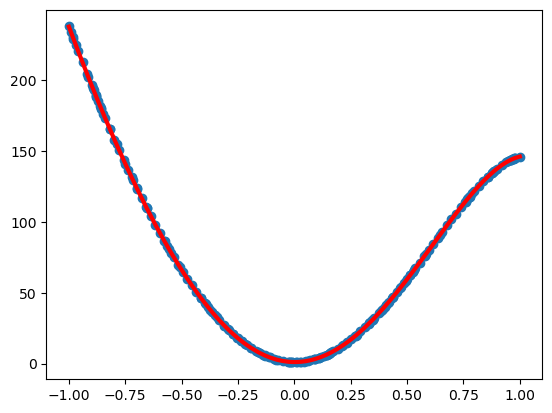

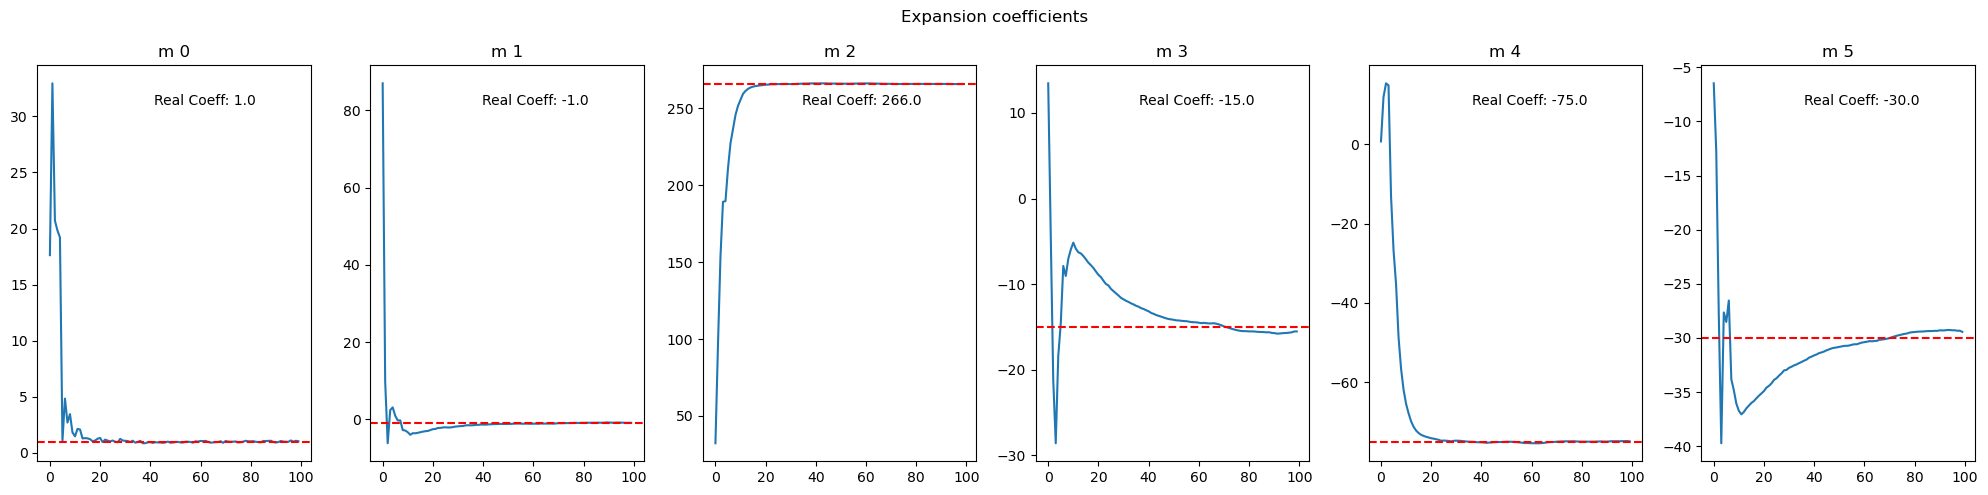

In [48]:
# Test for online Kaczmarz
x = np.linspace(-1, 1, 100)
y = (-30 * x**5) + (-75 * x**4) + (-15 * x**3) + (266 * x**2) + (-1 * x) + 1 + np.random.normal(0, 0.1, 100)
A = np.array([[1, -1, 266, -15, -75, -30]])
print('A: ', A.shape)


################################################################################################
####    Definition of "Hyperparameters"
################################################################################################
t = 100 #timesteps
r = 25 # number of data points used to estimate the coefficientes
iterations = 10 # number of iterations of the projection algorithm, it converges arguably fast!
polynomial_degree = 5

## Initializing array to store the coefficients
coefficients = np.zeros(polynomial_degree+1)


################################################################################################
####    Online estimation of coefficients
################################################################################################

for timestep in range(t):
        
    ## This part just generates new additional points with the same function
    new_x = random.uniform(-1, 1)
    x = np.append(x, new_x)

    new_y = (-30 * new_x**5) + (-75 * new_x**4) + (-15 * new_x**3) + (266 * new_x**2) + (-1 * new_x) + 1 + random.uniform(-0.1, 0.1)
    y = np.append(y, new_y)

    ## This part creates the design matrix that is to be the input X of the estimation algorithm
    design_matrix = generate_design_matrix_from_1D_data(x,polynomial_degree)


    ## At the first iteration "timestep, t", start with randomized weights
    if timestep == 0:
        weight_predictions, beta_parameter = online_kaczmarz(design_matrix,y,iterations,r)
    
    ## At iteration "timestep, t">=1, start with the previously estimated coefficients
    else:
        # Assume data is a numpy array with shape (poly_order+1, timesteps)
        l = coefficients[:, -1]  # Extract the last column
        previous_weights = np.squeeze(l)  # Remove dimensions of size 1

        weight_predictions, beta_parameter = online_kaczmarz(design_matrix,y,iterations,r, previous_weights) ##########
    
    
    # print('weight_predictions: ', weight_predictions)
    
    coefficients = np.column_stack((coefficients, weight_predictions))



################################################################################################
####    Results
################################################################################################


coefficients = coefficients[:,1:]
print('coefficients shape: ', coefficients.shape)


np.set_printoptions(precision=2)
print('coefficients: ', coefficients[:,-1])
print('Real Coefficients : ', A)





################################################################################################
####    Online estimation of coefficients
################################################################################################

weights = coefficients[:,-1] #Using only the last iteration of the weight prediction]

## Application of the estiamted coefficients to calculate the estimated Y_hat values
y_hat =  generate_design_matrix_from_1D_data(x,polynomial_degree) @ weights.T




################################################################################################
####    Plots and graphs
################################################################################################

# Sort the data by x
sort_indices = np.argsort(x)
x_sorted = x[sort_indices]
y_hat_sorted = y_hat[sort_indices]


# plt.scatter(x,y)
plt.scatter(x, y)
plt.plot((x_sorted), (y_hat_sorted), color='red', linewidth = 3)


# Create a grid of subplots and flatten it
fig, axs = plt.subplots(ncols=polynomial_degree+1, figsize=(20, 5))
axs = axs.flatten()

# Plot each coefficient and add a horizontal line at the mean
for i in range(polynomial_degree+1):
    axs[i].plot(coefficients[i,:])
    mean_value = A[:,i].mean()
    axs[i].axhline(y=mean_value, linestyle='dashed', color='red')
    axs[i].text(0.8, 0.9, f"Real Coeff: {mean_value:.1f}", transform=axs[i].transAxes, ha='right')

# Set titles for the subplots
for i, ax in enumerate(axs):
    ax.set_title(f"m {i}")

# Add a main title to the figure
fig.suptitle('Expansion coefficients')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


    # for i in range(polynomial_degree+1):
    #     # Create a new figure and plot the data
    #     fig, a0 = plt.subplots()
    #     a0.plot(coefficients[i,:])
    #     a0.set_title(f"a {i}")
        
    #     # Add a horizontal at the mean of each coefficient
    #     a0.axhline(y=np.mean(coefficients[i,:]), linestyle='dashed', color='red')
    #     # a0.axhline(y=A[:,i], linestyle='dashed', color='red')